# <h1><center>MALNUTRITION</center></h1>     

In [1]:
import numpy as np
import pandas as pd
import bamboolib as bam
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.float_format = "{:.2f}".format
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(theme="pearl")

**Modules**: 
    
Numpy, Pandas {data analysis}, matplotlib,Seaborn  :{ Basic-Plotting,Themes},Plotly:{Visual-Plotting},
cufflinks:{Reading pandas data to plotly and required themes}.

In [2]:
data=pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.00,1.00,1.00,"4,846",nan,18.20,6.50,53.20,44.90,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.88
1,1,AFG,AFGHANISTAN,2004,2004,0,1.00,1.00,1.00,946,3.50,8.60,4.60,59.30,32.90,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.35
2,2,AFG,AFGHANISTAN,2013,2013,0,1.00,1.00,1.00,"44,26,469",4.00,9.50,5.30,40.40,24.60,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.57
3,3,AFG,AFGHANISTAN,2018,2018,0,1.00,1.00,1.00,NaN,1.60,5.10,4.10,38.20,19.10,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.44
4,4,ALB,ALBANIA,1996-98,1997,2,0.00,0.00,0.00,"7,642",nan,8.10,9.50,20.40,7.10,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.23


In [3]:
#drop unwanted columns for further analysis
data.drop(['ISO code','Survey Year','Survey Sample (N)','Source','Report Author','Notes','Short Source'], axis=1, inplace=True)

In [4]:
data.head()

,Unnamed: 0,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,0,AFGHANISTAN,1997,0,1.00,1.00,1.00,nan,18.20,6.50,53.20,44.90,3838.88
1,1,AFGHANISTAN,2004,0,1.00,1.00,1.00,3.50,8.60,4.60,59.30,32.90,4789.35
2,2,AFGHANISTAN,2013,0,1.00,1.00,1.00,4.00,9.50,5.30,40.40,24.60,5444.57
3,3,AFGHANISTAN,2018,0,1.00,1.00,1.00,1.60,5.10,4.10,38.20,19.10,5601.44
4,4,ALBANIA,1997,2,0.00,0.00,0.00,nan,8.10,9.50,20.40,7.10,309.23


In [5]:
def income_map(val):#Mapping 0,1,2,3 Income to respective names low,low middle, upper middle ,high income
    mapper = {0:'Low Income', 1:'Lower Middle Income', 2:'Upper Middle Income',3:'High Income'}
    return mapper[val]

In [6]:
data['Income Classification'] =data['Income Classification'].apply(income_map)

In [7]:
def lldc_map(val):#mapping 0,1,2 to their respective names
    mapper = {0:'Others', 2:'SIDS', 1:'LLDC'}
    return mapper[val]

In [8]:
data['LLDC or SID2'] =data['LLDC or SID2'].apply(lldc_map)

In [9]:
data.head()

,Unnamed: 0,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,0,AFGHANISTAN,1997,Low Income,1.00,1.00,LLDC,nan,18.20,6.50,53.20,44.90,3838.88
1,1,AFGHANISTAN,2004,Low Income,1.00,1.00,LLDC,3.50,8.60,4.60,59.30,32.90,4789.35
2,2,AFGHANISTAN,2013,Low Income,1.00,1.00,LLDC,4.00,9.50,5.30,40.40,24.60,5444.57
3,3,AFGHANISTAN,2018,Low Income,1.00,1.00,LLDC,1.60,5.10,4.10,38.20,19.10,5601.44
4,4,ALBANIA,1997,Upper Middle Income,0.00,0.00,Others,nan,8.10,9.50,20.40,7.10,309.23


In [10]:
data.columns # columns in the dataset

Index(['Unnamed: 0', 'Country', 'Year', 'Income Classification', 'LDC', 'LIFD',
       'LLDC or SID2', 'Severe Wasting', 'Wasting', 'Overweight', 'Stunting',
       'Underweight', 'U5 Population ('000s)'],
      dtype='object')

In [11]:
data.shape # 

(924, 13)

In [12]:
data.info()#info() of all the variables exsisting in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             924 non-null    int64  
 1   Country                924 non-null    object 
 2   Year                   924 non-null    int64  
 3   Income Classification  924 non-null    object 
 4   LDC                    924 non-null    float64
 5   LIFD                   924 non-null    float64
 6   LLDC or SID2           924 non-null    object 
 7   Severe Wasting         696 non-null    float64
 8   Wasting                877 non-null    float64
 9   Overweight             788 non-null    float64
 10  Stunting               887 non-null    float64
 11  Underweight            902 non-null    float64
 12  U5 Population ('000s)  924 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 94.0+ KB


In [13]:
data['Country'].unique()# Data of all 150 countries in the dataset 

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA', 'ARGENTINA',
       'ARMENIA', 'AUSTRALIA', 'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA (PLURINATIONAL STATE OF)', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM', 'BULGARIA',
       'BURKINA FASO', 'BURUNDI', 'CABO VERDE', 'CAMBODIA', 'CAMEROON',
       'CANADA', 'CENTRAL AFRICAN REPUBLIC (THE)', 'CHAD', 'CHILE',
       'CHINA', 'COLOMBIA', 'COMOROS (THE)', 'CONGO (THE)', 'COSTA RICA',
       "COTE D'IVOIRE", 'CUBA', 'CZECHIA',
       "DEMOCRATIC PEOPLE'S REP. OF KOREA (THE)",
       'DEMOCRATIC REP. OF THE CONGO (THE)', 'DJIBOUTI',
       'DOMINICAN REPUBLIC (THE)', 'ECUADOR', 'EGYPT', 'EL SALVADOR',
       'EQUATORIAL GUINEA', 'ERITREA', 'ESWATINI', 'ETHIOPIA', 'FIJI',
       'GABON', 'GAMBIA (THE)', 'GEORGIA', 'GERMANY', 'GHANA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HAITI',
       'HONDURAS', 'INDIA', 'INDONESIA'

In [14]:
data['Year'].unique()# Data of all 150 countries with year wise analysis 

array([1997, 2004, 2013, 2018, 2000, 2005, 2009, 2017, 1987, 1992, 1995,
       2002, 2006, 2012, 1996, 2007, 2015, 1994, 2019, 1998, 2010, 2016,
       2014, 2001, 2011, 1989, 1986, 1990, 1991, 1993, 1999, 2003, 2008,
       1988, 1985, 1983], dtype=int64)

In [15]:
data.describe()

,Unnamed: 0,Year,LDC,LIFD,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.00,924.00,924.00,924.00,696.00,877.00,788.00,887.00,902.00,924.00
mean,461.50,2003.73,0.35,0.42,2.19,6.96,6.43,29.06,15.84,6182.70
std,266.88,8.79,0.48,0.49,1.91,5.04,4.64,15.83,12.51,16795.94
min,0.00,1983.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,230.75,1996.00,0.00,0.00,0.80,2.90,2.90,16.65,4.93,559.67
50%,461.50,2004.50,0.00,0.00,1.60,5.90,5.50,29.20,13.40,1795.52
75%,692.25,2011.00,1.00,1.00,2.90,9.70,8.70,40.20,23.10,4194.21
max,923.00,2019.00,1.00,1.00,12.90,25.30,30.10,73.60,66.80,132966.78


--->Gives the description of numerical variables across the attributes 

Observations:

Count : Total number of values present in respective columns. 
Mean: Mean of all the values present in the respective columns.
Std: Standard Deviation of the values present in the respective columns.
Min: The minimum value in the column.
25%: Gives the 25th percentile value. 
50%: Gives the 50th percentile value. 
75%: Gives the 75th percentile value.
Max: The maximum value in the column.

NOTE:

The percentile usually indicates that a certain percentage falls below that percentile. For example, if you score in the 25th percentile, then 25% of test takers are below your score. The “25” is called the percentile rank.


In [16]:
data.isnull().sum() # knowling number of non-missing values for each variable

Unnamed: 0                 0
Country                    0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
U5 Population ('000s)      0
dtype: int64

In [17]:
data ['Wasting'].fillna(data ['Wasting'].mean(), inplace=True)
data ['Severe Wasting'].fillna(data ['Severe Wasting'].mean(), inplace=True)
data ['Overweight'].fillna(data ['Overweight'].mean(), inplace=True)
data ['Stunting'].fillna(data ['Stunting'].mean(), inplace=True)
data ['Underweight'].fillna(data ['Underweight'].mean(), inplace=True)

In [18]:
data.isnull().sum() # knowling number of non-missing values for each variable

Unnamed: 0               0
Country                  0
Year                     0
Income Classification    0
LDC                      0
LIFD                     0
LLDC or SID2             0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

In [19]:
fig = px.box(data, y=data['Underweight'] ,title="EDA for Underweight")
fig.show()

In [20]:
fig1= px.box(data, y=data['Severe Wasting'] ,title="EDA for Severe Wasting")
fig1.show()

In [21]:
fig2= px.box(data, y=data['Wasting'] ,title="EDA for Wasting")
fig2.show()

In [22]:
fig3= px.box(data, y=data['Overweight'] ,title="EDA for Overweight")
fig3.show()

In [23]:
fig4= px.box(data, y=data['Stunting'] ,title="EDA for Stunting")
fig4.show()

(array([225.,   0.,   0., 281.,   0.,   0., 335.,   0.,   0.,  83.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

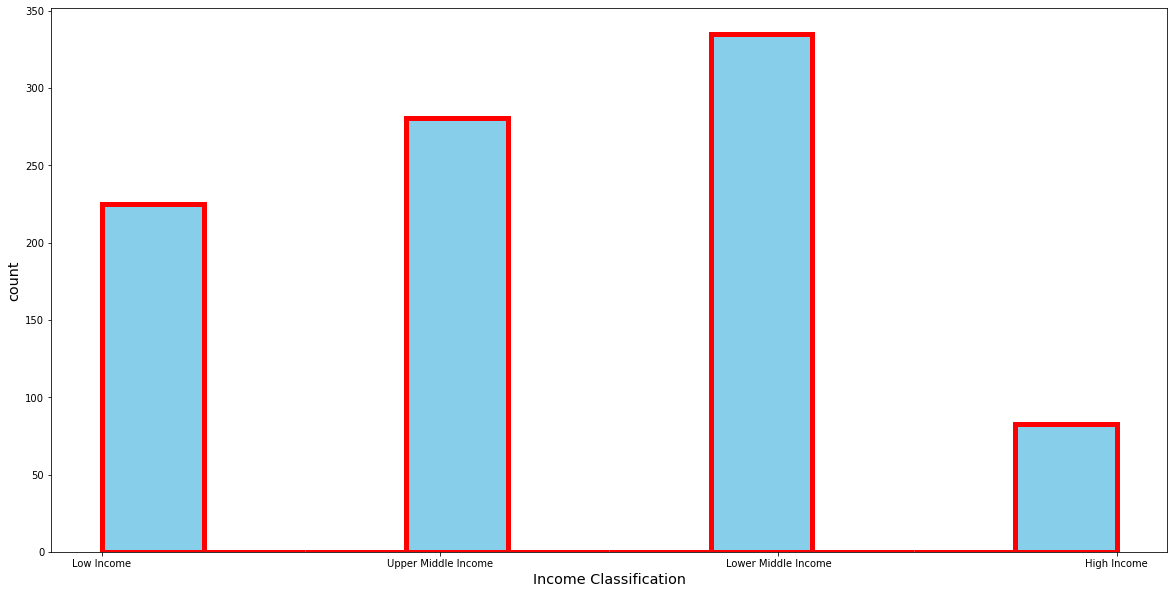

In [24]:
x = data['Income Classification']
plt.figure(figsize=(20,10))
plt.ylabel('count', size='x-large')
plt.xlabel('Income Classification', size= 'x-large')
fig5=plt.hist(x,bins=10, color='skyblue', edgecolor='red', linewidth=5)
fig5

**Observation**:
    
This dataset consists of High count in Lower-Middle-Income across all other Income classes

In [25]:
df_IL=pd.crosstab(data['Income Classification'],data['LDC'])

In [26]:
fig6=df_IL.iplot(kind='bar',title='Income Classification across LDC',yTitle='No of Countries',asFigure=True)
fig6.show()


**Observation**:
    
    Low-Income , Lower-Middle-Income are Least developed Countries Category , wheras Upper-Middle and High Income are Developing Countries which are not no LDC
    

In [27]:
df_IS=pd.crosstab(data['Income Classification'],data['LIFD'])

In [28]:
fig7=df_IS.iplot(kind='bar',title='Income Classification across LIFD',yTitle='No of Countries',asFigure=True )
fig7.show()

**Observation**:
    
    Low-Income , Lower-Middle-Income are Low Income food Deficient Category , wheras Upper-Middle and High Income are NLIFD.
    Most number of Countries are LIFD and lie in low, low middle Category

In [29]:
d=pd.crosstab(data['Income Classification'],data['LLDC or SID2'])

In [30]:
fig8=d.iplot(kind='bar',title='Income Classification across LLDC or SID2',yTitle='No of Countries',asFigure=True)
fig8.show()

**Observation**:
    
    1) Other Countries Lie in most of The income levels.Lower-Middle-Incomes has highest % of other countries apart Other   Incomes.
    2) Intrestingly Other Countries are part of Upper-Middle-Income.
    3) SIDS are lowest percentage of category across all countries.
    4) Low-Income has more proportion of LLDC and same exsists for Lowe-Middle-Income

# Multivariate Analysis

---->Multivariate analysis is a set of statistical techniques used for analysis of data that contain more imputs to get one output. 

In [31]:
corr = data.corr()# Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [32]:
corr = corr.reset_index()
corr

,index,Unnamed: 0,Year,LDC,LIFD,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,Unnamed: 0,1.00,0.06,-0.01,0.06,-0.04,-0.02,-0.07,-0.05,-0.06,-0.11
1,Year,0.06,1.00,0.11,0.14,-0.10,-0.14,-0.00,-0.23,-0.18,-0.04
2,LDC,-0.01,0.11,1.00,0.63,0.28,0.42,-0.36,0.57,0.56,-0.11
3,LIFD,0.06,0.14,0.63,1.00,0.26,0.41,-0.35,0.52,0.49,0.01
4,Severe Wasting,-0.04,-0.10,0.28,0.26,1.00,0.76,0.04,0.38,0.52,0.11
5,Wasting,-0.02,-0.14,0.42,0.41,0.76,1.00,-0.25,0.56,0.79,0.18
6,Overweight,-0.07,-0.00,-0.36,-0.35,0.04,-0.25,1.00,-0.27,-0.44,-0.08
7,Stunting,-0.05,-0.23,0.57,0.52,0.38,0.56,-0.27,1.00,0.83,0.14
8,Underweight,-0.06,-0.18,0.56,0.49,0.52,0.79,-0.44,0.83,1.00,0.22
9,U5 Population ('000s),-0.11,-0.04,-0.11,0.01,0.11,0.18,-0.08,0.14,0.22,1.00


fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(corr  , annot = True);

#from scipy import stats
# Filter for correlation value greater than threshold
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.7) & (sort < 1)])

**Observation**:


    As expected stunting, underweight and wasting are highly correlated. heatmap can be represented for discrete values

In [33]:
#sns.pairplot(data[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting','Underweight']])

**Observation**:

1)Stunting% and Underweight% are in Linear Relation, they are said to be correlated

2)Wasting and Underweight % are in Linear Relation , they are said to be correlated

# Income Classififcation

In [34]:
data.groupby(['Income Classification'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].count()

,Severe Wasting,Wasting,Overweight,Stunting,Underweight
Income Classification,,,,,
High Income,83,83,83,83,83
Low Income,225,225,225,225,225
Lower Middle Income,335,335,335,335,335
Upper Middle Income,281,281,281,281,281


--------More Countries are classified as Lower Middle Income on basis of GDP, GNP-----------

In [35]:
fig9=data.groupby(['Income Classification'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].mean().iplot(kind='bar',xTitle= 'Income Level' ,yTitle= 'Parameter %',title='Income Classification % across all Parameters',asFigure=True)
fig9.show()

**Observation**: 
    
    On an average there is more Stunting % and Underweight% across all Incomes which is alarming situation over health status

# Country Wise-Data

In [36]:
data['Country'].value_counts()

BANGLADESH                            24
VIET NAM                              22
VENEZUELA (BOLIVARIAN REPUBLIC OF)    21
JAMAICA                               20
KUWAIT                                18
                                      ..
BRUNEI DARUSSALAM                      1
CUBA                                   1
BELARUS                                1
CANADA                                 1
JAPAN                                  1
Name: Country, Length: 152, dtype: int64

In [37]:
country =data.groupby(['Year'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].mean()
country = country.reset_index()
country

,Year,Severe Wasting,Wasting,Overweight,Stunting,Underweight
0,1983,1.20,5.50,3.10,46.00,22.80
1,1985,2.19,15.10,9.39,33.08,22.77
2,1986,1.78,7.13,5.94,31.73,20.36
3,1987,1.90,5.91,4.26,33.87,19.82
4,1988,1.41,6.01,4.79,34.85,15.53
5,1989,1.99,7.67,6.61,30.12,16.10
6,1990,2.52,7.99,5.70,35.46,22.19
7,1991,2.17,6.59,6.11,31.23,16.57
8,1992,2.37,7.75,5.37,40.02,22.10
9,1993,2.53,10.05,5.62,36.80,22.55


In [38]:
fig10=country[['Stunting','Wasting','Underweight','Severe Wasting','Overweight']].iplot(kind='line',title="Change in Parameter% over Years",asFigure=True)
fig10.show()

# Which country shows highest Severe Wasting percentage?

In [39]:
h_con_sW= data.loc[:,['Country','Severe Wasting']]# choosing the columns
h_con_sW

,Country,Severe Wasting
0,AFGHANISTAN,2.19
1,AFGHANISTAN,3.50
2,AFGHANISTAN,4.00
3,AFGHANISTAN,1.60
4,ALBANIA,2.19
...,...,...
919,ZIMBABWE,0.50
920,ZIMBABWE,0.80
921,ZIMBABWE,0.70
922,ZIMBABWE,1.10


In [40]:
h_con_sW['percent'] = h_con_sW.groupby('Country')['Severe Wasting'].transform('max')#creating a column with respect to country as a group which groups the mean of all respective observations into one record
h_con_sW = h_con_sW.drop('Severe Wasting',axis=1).drop_duplicates().sort_values('percent', ascending=False).head(5)#sorting for the first  values
h_con_sW

,Country,percent
733,SOUTH SUDAN,12.90
103,BURKINA FASO,12.10
504,MALI,9.80
221,DJIBOUTI,9.60
499,MALDIVES,9.20


In [41]:
fig11 = px.pie(h_con_sW, names='Country', values='percent', title='Highest Severe Wasting% Across all Countries')
fig11.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=True)
fig11.show()

**Observation**:

           South-Sudan has a  high Severe-Wasting % of 24.1%, respectively Burkina Faso 22.6%, Mali 18.3%,Djibouti 17.9% , Maldives 17.2% . Observations from other parameters may provide a clear overview 
    

# Which country shows highest  Wasting percentage?

In [42]:
h_con_w = data.loc[:,['Country','Wasting']]
h_con_w['percent'] = h_con_w.groupby('Country')['Wasting'].transform('max')
h_con_w = h_con_w.drop('Wasting',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig12 = px.pie(h_con_w, names='Country', values='percent',title='Highest Wasting% Across all Countries')
fig12.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig12.show()

**Observation**:

     Strangely South-sudan and Burkina- Faso continues to be in top-5 highest percentag of Wasting with 20.4%  and 20.2% respectively with Niger 21% as maximum

# Which country shows highest Overweight percentage?¶

In [43]:
h_con_ow = data.loc[:,['Country','Overweight']]
h_con_ow['percent'] = h_con_ow.groupby('Country')['Overweight'].transform('max')
h_con_ow = h_con_ow.drop('Overweight',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig13= px.pie(h_con_ow, names='Country', values='percent', title='Highest Overweight% Across all Countries')
fig13.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig13.show()

**Observation**:

Albania has the highest overweight% 22.4 on an average with other countries like Libya , Ukraine ,Bosnia , Montenegro . Intrestingly most of them are from Upper-Middle-Income.

# Which country shows highest Stunting percentage?

In [44]:
h_con_st = data.loc[:,['Country','Stunting']]
h_con_st['percent'] = h_con_st.groupby('Country')['Stunting'].transform('max')
h_con_st = h_con_st.drop('Stunting',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig14= px.pie(h_con_st, names='Country', values='percent',title='Highest Stunting% Across all Countries')
fig14.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig14.show()

# Which country shows highest Underweight percentage?

In [45]:
h_con_uw= data.loc[:,['Country','Underweight']]
h_con_uw['percent'] =h_con_uw.groupby('Country')['Underweight'].transform('max')
h_con_uw = h_con_uw.drop('Underweight',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig15 = px.pie(h_con_uw, names='Country', values='percent', title='Highest Underweight% Across all Countries')
fig15.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig15.show()

**Observation**:

Bangladesh continues to be on charts with Underweight % on average 24.3% , with India,Korea ,Nepal,Korea , Timor-Leste following on.Intrestingly these countries are prone to malnutrition which will be shown in the obsevations discussed below.

**Final Observation**: 

1) South-Sudan , Burkina Faso , Djibouti , Bangladesh , India , Nepal are frequently seen over the pie plots above and secondly,    all are a subset of both low, lower-middle-Income. 

2) On a final Note  [ Income is directly proportional to Reducing Malnutrition parameter Effect ]


3) Asia and Africa are two continents prone to High Malnutrition-Estimate

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
import json
import plotly.graph_objs as go
from dash.dependencies import Input, Output


app = dash.Dash()
colors = {
    'background': '#FCF6F5FF',
    'text': 'Royalblue',
    'text-Align': 'center'
    
}

#image_filename = 'fig5.png' # replace with your own image
#test_base64 = base64.b64encode(open(fig5, 'rb').read()).decode('ascii')

app.layout = html.Div(style={
'backgroundColor': colors['background']
}, children=[
    html.Div(html.H1(children='MALNUTRITION-ESTIMATES DASHBOARD',style={'color':'#422057FF',            #all should be as string
                                                   'text-align':'center',
                                                    'font-size':'350%','padding': '20px',
                                                   'background-color':'#FCF951FF','margin-top': '0px',
                                                   'border-style': 'double',
                                                   'display':'inline-block',  # display list items horizontally instead of vertically.
                                                   'width':'100%'
                                                    })),
        dcc.Dropdown(
                id= 'dropdown',
        options=[
        ################################################################
            {'label': 'Univariate_Analysis', 'value': 'Univariate_Analysis'},
            {'label': 'INCOME', 'value': 'Income' },
            {'label': 'YEAR-WISE-PARAMETER-ESTIMATE', 'value': 'Multivariate Analysis'},
            {'label': 'Highest Country Percentage', 'value': 'Highest Country Percentage'}
            #{'label': 'total runnersup percentage of worldcup', 'value': 'total runnersup percentage of worldcup'}
             
        #####################################################################    
           
        ],
        multi='False'
            ),
    html.Div(id='output')
        
])

className='container'

@app.callback(Output('output', 'children'), [Input('dropdown', 'value')])
def display_graphs(selected_values):
    graphs = []
 ################################################################   

    if 'Univariate_Analysis' in selected_values:
        
        graphs.append(html.H1('BOX PLOT FOR ALL ATTRIBUTES',style={'color':'#422057FF',        #text color        #all should be as string
                                                   'text-align':'center',          # Text Allignment
                                                   'background-color':'#FCF951FF',      # Background color
                                                   'border-style': 'double',       # boarder type
                                                   'display':'inline-block',       #inline means in one line
                                                   'width':'100%'
                                                    })),
        graphs.append(dcc.Graph(id='firstgraph01',figure=fig,style={'width':'20%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph02',figure=fig1,style={'width':'20%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph03',figure=fig2,style={'width':'20%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph04',figure=fig3,style={'width':'20%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph05',figure=fig4,style={'width':'20%','display':'inline-block'})
                
        ),
        
   #################################
 ################################################################   

    if 'Income' in selected_values:
        graphs.append(html.H1('INCOME CLASSIFICATION',style={'color':'#422057FF',        #text color Sky Blue       #all should be as string
                                                   'text-align':'center',          # Text Allignment
                                                   'background-color':'#FCF951FF',      # Background color
                                                   'border-style': 'double',       # boarder type
                                                   'display':'inline-block',       #inline means in one line
                                                   'width':'100%'
                                                    })),
        graphs.append(dcc.Graph(id='firstgraph07',figure=fig6,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph08',figure=fig7,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph09',figure=fig8,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph10',figure=fig9,style={'width':'100%','display':'inline-block'})),
        
   ################################
    if 'Multivariate Analysis' in selected_values:
        graphs.append(html.H1('YEAR-WISE-PARAMETER-ESTIMATE',style={'color':'#422057FF',        #text color        #all should be as string
                                                   'text-align':'center',          # Text Allignment
                                                   'background-color':'#FCF951FF',      # Background color
                                                   'border-style': 'double',       # boarder type
                                                   'display':'inline-block',       #inline means in one line
                                                   'width':'100%'
                                                    })),
        graphs.append(dcc.Graph(id='firstgraph11',figure=fig10,style={'width':'100%','display':'inline-block'})
               
        ),
        
    
        
   #################################
 ################################################################   

    if 'Highest Country Percentage' in selected_values:
        graphs.append(html.H1('TOP 5 COUNTRIES PARAMETER ESTIMATE',style={'color':'#422057FF',        #text color        #all should be as string
                                                   'text-align':'center',          # Text Allignment
                                                   'background-color':'#FCF951FF',      # Background color
                                                   'border-style': 'double',       # boarder type
                                                   'display':'inline-block',       #inline means in one line
                                                   'width':'100%'
                                                    })),
        graphs.append(dcc.Graph(id='firstgraph12',figure=fig11,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph13',figure=fig12,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph14',figure=fig13,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph15',figure=fig14,style={'width':'100%','display':'inline-block'})),
        graphs.append(dcc.Graph(id='firstgraph16',figure=fig15,style={'width':'100%','display':'inline-block'})
                
        ),
   #################################
    return graphs
    
if __name__ == '__main__':
    app.run_server()#debug=False



Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1618119687.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1618119687.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1618119687.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1618119687.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1618119687.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_16_0m1618119688.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\MY PC\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\MY PC\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\MY PC\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\MY PC\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\MY PC\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\MY PC\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\MY PC\anaconda3\lib\site-packages\dash\dash.py", line 1079, in dispatch
    response.set_d

127.0.0.1 - - [17/Jul/2021 11:27:53] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [17/Jul/2021 11:27:53] "GET /_dash-component-suites/dash_core_components/async-dropdown.v1_16_0m1617903285.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:57] "GET /_dash-component-suites/dash_core_components/async-graph.v1_16_0m1617903285.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:27:57] "GET /_dash-component-suites/dash_core_components/async-plotlyjs.v1_16_0m1617903285.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 11:28:01] "POST /_dash-update-component HTTP/1.1" 200 -
